>[Projet 4 - Anticipez le retard de vol des avions](#scrollTo=xSBUsnc1AvdH)

>>[1.Initialisation](#scrollTo=xSBUsnc1AvdH)

>>>[1.1.Import des librairies nécessaires au projet](#scrollTo=xSBUsnc1AvdH)

>>>[1.2.Montage du lecteur](#scrollTo=pHSlT5tMz4np)

>>>[1.3.Création du contexte de mémoire](#scrollTo=WkUg-abvAvdS)

>>[2.Outils de sauvegarde entre sessions](#scrollTo=jlETEw_iAvdZ)

>>>[2.1.Sauvegarde du dataframe](#scrollTo=k8vcfiC4Avdb)

>>>[2.2.Point de restauration _ Chargement du dataframe](#scrollTo=DerCVHhLAvdl)

>>[3.Chargement de la base](#scrollTo=VrorU-8cAvds)

>>>[3.1.Test d'homogénéité des fichiers](#scrollTo=J7wYLaQtnueK)

>>>[3.2.Import et concaténation des fichiers](#scrollTo=O5MRvYTxep6I)

>>[4.Exploration](#scrollTo=xwpPTfuQAveR)

>>>[4.1.Taux de remplissage](#scrollTo=KOAiHdWTAveX)

>>>[4.2.Observations sur les données](#scrollTo=9p23JUV_Aveg)

>>>>[a. Format des dates](#scrollTo=9p23JUV_Aveg)

>>>>[b. Vols annulés](#scrollTo=9p23JUV_Aveg)

>>>>[c. Dernière colonne](#scrollTo=9p23JUV_Aveg)

>>>[4.3.Suppression des colonnes inutiles](#scrollTo=wiImDpAbTnAY)

>>>[4.4.Analyse univariée](#scrollTo=8aXa4YFcAveu)

>>[5.Jeux de test et d'entrainement](#scrollTo=Dzbl_R3Kjq60)

>>>[5.1.Séparation jeux de test et entrainement](#scrollTo=RoXlvRMunHEn)

>>>[5.2.Suppression des outliers sur X_train](#scrollTo=l1p7r-88ZN6F)

>>[6.Définition des features](#scrollTo=uGDPosIMAvfA)

>>>[6.1.Recherche de corrélation](#scrollTo=kWagHGOZm3cu)

>>>[6.2.Recherche de lien avec le retard - Analyse bivariée Retard  / toutes les autres variables](#scrollTo=Eb7zGxVDAvfN)

>>>>[a.Jour de la semaine](#scrollTo=z-R21gzHAvfb)

>>>>[b.Mois de l'année](#scrollTo=A2RXpPIqAvfm)

>>>>[c.Heure de la journée](#scrollTo=CIqkScT_Avf6)

>>>>[d.Compagnie aérienne](#scrollTo=EpzF-m9gAvgU)

>>>>[e.Aéroport de départ](#scrollTo=JQMDMmjXaJff)

>>>>[f.Aéroport d'arrivée](#scrollTo=RWIYAeYiaNul)

>>>>[g. Groupe de distance](#scrollTo=0GKO3gbBiC-x)

>>>>[h.Jours fériés](#scrollTo=8NcNgsBfoBJn)

>>>>[i.Taille aéroport](#scrollTo=Mv8pwozswsTO)

>>>[6.3.Application des features au jeu d'entrainement](#scrollTo=4eGfk9fiAvgp)

>>>>[a.Features](#scrollTo=iMnaEILomJIR)

>>>>[b.Concaténation](#scrollTo=umK_5ohVvZgI)

>>[7.Application des règles de création des features au jeu de test](#scrollTo=GoWN3ZU0vZgF)

>>[8.Objets nécessaires à l'API](#scrollTo=j8gX6mNkNcm7)

>>>[8.1.Définition de la table IATA / Nom  de compagnie](#scrollTo=RYbRd6MAlqoB)

>>>[8.2.Définition de la table ID / Nom  d'aéroport pour l'API](#scrollTo=6TZrT2ZWOHL-)

>>[9.Sauvegardes](#scrollTo=NnUXDllwvZgP)

>>>[9.1.Jeu d'entrainement](#scrollTo=yEDmJhknl1_V)

>>>[9.2.Jeu de test](#scrollTo=pz6kjgg-vZgQ)



# Projet 4 - Anticipez le retard de vol des avions
## 1.Initialisation
### 1.1.Import des librairies nécessaires au projet

In [0]:
# Import the `pandas` library as `pd`
import pandas as pd

# Import pyplot from matplotlib as plt
import matplotlib.pyplot as plt


# Import the `numpy` library as `np`
import numpy as np

# Import de la librairie os
import os

# Import de la librairie datetime
import datetime

# Import de la librairie joblib
from joblib import dump, load

# Import des modèles de validation croisée
from sklearn.model_selection import train_test_split, KFold

### 1.2.Montage du lecteur

In [4]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


### 1.3.Création du contexte de mémoire

In [0]:
# cache directory for joblib objects
folder = "/content/gdrive/My Drive/Colab Notebooks/joblib_memmap/"
try:
    os.mkdir(folder)
except FileExistsError:
    pass

## 2.Outils de sauvegarde entre sessions

### 2.1.Sauvegarde du dataframe

In [0]:
# data_filename_memmap = os.path.join(folder, 'data_memmap')
# dump(global_df, data_filename_memmap)

In [0]:
# dump(data, data_filename_memmap)

### 2.2.Point de restauration _ Chargement du dataframe

In [0]:
# data_filename_memmap = os.path.join(folder, 'data_memmap')
# data = load(data_filename_memmap, mmap_mode='r')

## 3.Chargement de la base

### 3.1.Test d'homogénéité des fichiers
La base de données d'entrée est composée de plusieurs fichiers. L'idée est dans un premier temps de les ouvrir pour vérifier que les données sont consistantes entre les fichiers (nom de colonne, type de donnée pour faire simple).
Cela nous permettra dans un second de temps fusionner tous les fichiers dans un seul dataframe depuis lequel nous travaillerons.

Méthode conseillée dans la documentation de pandas:
http://pandas.pydata.org/pandas-docs/stable/cookbook.html#cookbook-csv-multiple-files
http://pandas.pydata.org/pandas-docs/stable/generated/pandas.concat.html#pandas.concat

In [0]:
str_path_gdrive = "/content/gdrive/My Drive/Colab Notebooks/Base/Feed/"

In [0]:
# str_path = "./Base/Feed/"

In [0]:
# Liste des fichiers à importer placés dans le répertoire Feed
liste_fichiers = sorted(os.listdir(str_path_gdrive))

In [12]:
liste_fichiers

['2016_01.csv',
 '2016_02.csv',
 '2016_03.csv',
 '2016_04_modified.csv',
 '2016_05.csv',
 '2016_06.csv',
 '2016_07.csv',
 '2016_08.csv',
 '2016_09.csv',
 '2016_10.csv',
 '2016_11.csv',
 '2016_12.csv']

Lors de la première tentative d'ouverture des fichiers, une erreur apparait à l'ouverture de '2016_04.csv': "DtypeWarning: Columns (48) have mixed types", donc on spécifie le champs en string afin de voir quel type de données on a.

Erreur à l'ouverture: "ParserError: Error tokenizing data. C error: Expected 65 fields in line 121012, saw 75". Cette erreur est probablement dûe à un nombre excessif de séparateurs (','). Solutions possibles:
    - ajouter l'argument usecols = range(0, 65) pour ne conserver que les 65 premières colonnes et ainsi ne pas conserver ce qui est au delà sur la ou les lignes qui génèrent l'erreur.
    - utiliser l'argument names pour ajouter les colonnes manquantes, vérifier que ce sont bien des colonnes vides, et ensuite les supprimer. il faut alors penser à récupérer les valeurs de la première ligne pour corriger les noms des colonnes
    - ajouter l'argument "error_bad_lines=False". l'inconvénient est que les lignes concernées sont supprimées. On a donc une perte d'information (aussi infime soit-elle par rapport à la quantité totale), alors que l'erreur parait corrigible.
    
Après observation en détail du fichier '2016_04.csv', ligne 121012, j'en déduis que l'erreur provient d'une "fusion" de deux lignes. Je choisis donc de supprimer la ligne qui comporte l'erreur car les données ne sont pas exploitables.
Le fichier 04 présente également une ligne où le format des données est différent (au lieu d'être codée sur plusieurs colonnes, la date est de type AAAA/MM/JJ, ce qui entraîne des types de données différents (décalage des colonnes). Je vais donc récupérer les types de données du premier fichier, et l'imposer lors de l'ouverture des autres fichiers.


Suppression des lignes corrompues du fichier à la main (dans Notepad ++)

In [13]:
# Import des fichiers pour analyse
noms_col = []
types_col = []
for fichier in liste_fichiers:
    print("Ouverture de ", fichier)
    str_fichier = str_path_gdrive + fichier
    data = pd.read_csv(str_fichier,sep=',', error_bad_lines=False)
    if noms_col == []:
        noms_col.append(data.columns.values)
    else:
        if np.all(noms_col == data.columns.values):
            print('\tNoms de colonnes OK')
        else:
            print('\tNoms de colonnes différents dans le fichier: ', fichier)
    if types_col == []:
        types_col = data.dtypes.values
        #types_col.append(data.dtypes.values)
    else:
        if np.all(types_col == data.dtypes.values):
            print('\tTypes de données OK')
        else:
            print('\tTypes de données différents dans le fichier: ', fichier)
            for i in range(len(types_col)):
                if types_col[i] != data.dtypes.values[i]:
                    print(i,noms_col[0][i], types_col[i], data.dtypes.values[i])

Ouverture de  2016_01.csv
Ouverture de  2016_02.csv
	Noms de colonnes OK
	Types de données OK
Ouverture de  2016_03.csv


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  
/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (48) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


	Noms de colonnes OK
	Types de données OK
Ouverture de  2016_04_modified.csv
	Noms de colonnes OK
	Types de données différents dans le fichier:  2016_04_modified.csv
55 DISTANCE_GROUP int64 float64
Ouverture de  2016_05.csv
	Noms de colonnes OK
	Types de données OK
Ouverture de  2016_06.csv
	Noms de colonnes OK
	Types de données OK
Ouverture de  2016_07.csv
	Noms de colonnes OK
	Types de données OK
Ouverture de  2016_08.csv
	Noms de colonnes OK
	Types de données OK
Ouverture de  2016_09.csv
	Noms de colonnes OK
	Types de données OK
Ouverture de  2016_10.csv
	Noms de colonnes OK
	Types de données OK
Ouverture de  2016_11.csv
	Noms de colonnes OK
	Types de données OK
Ouverture de  2016_12.csv
	Noms de colonnes OK
	Types de données OK


In [14]:
len(types_col)

65

### 3.2.Import et concaténation des fichiers

In [15]:
# Import des fichiers pour concaténation et exploitation
noms_col = []
types_col = []

global_df = pd.DataFrame()

for fichier in liste_fichiers:
    print("Ouverture de ", fichier)
    str_fichier = str_path_gdrive + fichier
    data = pd.read_csv(str_fichier,sep=',',error_bad_lines=False)
    global_df = pd.concat([global_df, data], ignore_index=True)

Ouverture de  2016_01.csv
Ouverture de  2016_02.csv
Ouverture de  2016_03.csv


/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (48) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Ouverture de  2016_04_modified.csv
Ouverture de  2016_05.csv
Ouverture de  2016_06.csv
Ouverture de  2016_07.csv
Ouverture de  2016_08.csv
Ouverture de  2016_09.csv
Ouverture de  2016_10.csv
Ouverture de  2016_11.csv
Ouverture de  2016_12.csv


In [16]:
global_df.head()

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,UNIQUE_CARRIER,AIRLINE_ID,CARRIER,TAIL_NUM,...,DISTANCE_GROUP,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,FIRST_DEP_TIME,TOTAL_ADD_GTIME,LONGEST_ADD_GTIME,Unnamed: 64
0,2016,1,1,6,3,2016-01-06,AA,19805,AA,N4YBAA,...,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2016,1,1,7,4,2016-01-07,AA,19805,AA,N434AA,...,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2016,1,1,8,5,2016-01-08,AA,19805,AA,N541AA,...,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2016,1,1,9,6,2016-01-09,AA,19805,AA,N489AA,...,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2016,1,1,10,7,2016-01-10,AA,19805,AA,N439AA,...,4.0,0.0,0.0,47.0,0.0,66.0,NaN,NaN,NaN,NaN


## 4.Exploration

In [17]:
global_df.describe()

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,AIRLINE_ID,FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_MARKET_ID,...,DISTANCE_GROUP,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,FIRST_DEP_TIME,TOTAL_ADD_GTIME,LONGEST_ADD_GTIME,Unnamed: 64
count,5635977.0,5.635977e+06,5.635977e+06,5.635977e+06,5.635977e+06,5.635977e+06,5.635977e+06,5.635977e+06,5.635977e+06,5.635977e+06,...,5.635975e+06,968440.000000,968440.000000,968440.000000,968440.000000,968440.000000,34533.000000,34533.000000,34533.000000,0.0
mean,2016.0,2.489489e+00,6.506787e+00,1.583258e+01,3.929674e+00,1.990254e+04,2.082353e+03,1.267617e+04,1.267620e+06,3.171714e+04,...,3.864899e+00,20.301263,2.709674,14.697945,0.085111,24.339327,1328.282252,35.485072,34.968407,NaN
std,0.0,1.123128e+00,3.416782e+00,8.796087e+00,1.985030e+00,3.801811e+02,1.695537e+03,1.535719e+03,1.535716e+05,1.281777e+03,...,2.431485e+00,57.451040,21.434164,30.567764,2.426291,45.941604,503.640838,31.122975,30.092505,NaN
min,2016.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.939300e+04,1.000000e+00,1.013500e+04,1.013503e+06,3.007000e+04,...,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,NaN
25%,2016.0,1.000000e+00,3.000000e+00,8.000000e+00,2.000000e+00,1.979000e+04,7.190000e+02,1.129200e+04,1.129202e+06,3.059900e+04,...,2.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,858.000000,16.000000,16.000000,NaN
50%,2016.0,3.000000e+00,7.000000e+00,1.600000e+01,4.000000e+00,1.980500e+04,1.646000e+03,1.288900e+04,1.288903e+06,3.145300e+04,...,3.000000e+00,2.000000,0.000000,2.000000,0.000000,2.000000,1348.000000,26.000000,26.000000,NaN
75%,2016.0,3.000000e+00,9.000000e+00,2.300000e+01,6.000000e+00,2.030400e+04,2.855000e+03,1.402700e+04,1.402702e+06,3.246700e+04,...,5.000000e+00,18.000000,0.000000,19.000000,0.000000,30.000000,1734.000000,43.000000,42.000000,NaN
max,2016.0,4.000000e+00,1.200000e+01,3.100000e+01,7.000000e+00,2.117100e+04,8.402000e+03,1.621800e+04,1.621801e+06,3.599100e+04,...,1.100000e+01,2142.000000,1157.000000,1446.000000,474.000000,1484.000000,2400.000000,335.000000,265.000000,NaN


### 4.1.Taux de remplissage

0 :	 YEAR 	 100.0
1 :	 QUARTER 	 100.0
2 :	 MONTH 	 100.0
3 :	 DAY_OF_MONTH 	 100.0
4 :	 DAY_OF_WEEK 	 100.0
5 :	 FL_DATE 	 100.0
6 :	 UNIQUE_CARRIER 	 100.0
7 :	 AIRLINE_ID 	 100.0
8 :	 CARRIER 	 100.0
9 :	 TAIL_NUM 	 99.77377480426198
10 :	 FL_NUM 	 100.0
11 :	 ORIGIN_AIRPORT_ID 	 100.0
12 :	 ORIGIN_AIRPORT_SEQ_ID 	 100.0
13 :	 ORIGIN_CITY_MARKET_ID 	 100.0
14 :	 ORIGIN 	 100.0
15 :	 ORIGIN_CITY_NAME 	 100.0
16 :	 ORIGIN_STATE_ABR 	 100.0
17 :	 ORIGIN_STATE_FIPS 	 100.0
18 :	 ORIGIN_STATE_NM 	 100.0
19 :	 ORIGIN_WAC 	 100.0
20 :	 DEST_AIRPORT_ID 	 100.0
21 :	 DEST_AIRPORT_SEQ_ID 	 100.0
22 :	 DEST_CITY_MARKET_ID 	 100.0
23 :	 DEST 	 100.0
24 :	 DEST_CITY_NAME 	 100.0
25 :	 DEST_STATE_ABR 	 100.0
26 :	 DEST_STATE_FIPS 	 100.0
27 :	 DEST_STATE_NM 	 100.0
28 :	 DEST_WAC 	 100.0
29 :	 CRS_DEP_TIME 	 100.0
30 :	 DEP_TIME 	 98.87263556966255
31 :	 DEP_DELAY 	 98.87263556966255
32 :	 DEP_DELAY_NEW 	 98.87263556966255
33 :	 DEP_DEL15 	 98.87263556966255
34 :	 DEP_DELAY_GROUP 	 98.87263556966

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


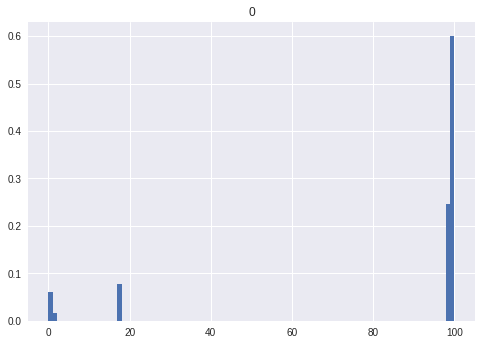

In [18]:
# Taux de remplissage des colonnes
taux_col = []
nb_vols = len(global_df)
taux = 0
for col in range(len(global_df.columns)):
    taux = global_df[global_df.columns[col]].count()/nb_vols*100
    taux_col.append(taux)
    print(col, ":\t", global_df.columns[col], "\t", taux)
# Tracé des taux de remplissage
df = pd.DataFrame(data=taux_col)
df.hist(normed=True, bins = 100)
plt.show()

### 4.2.Observations sur les données
#### a. Format des dates
Les dates sont découpées en champs Année, Mois, jour, jour de la semaine et on retrouve un champs avec la date complète

#### b. Vols annulés
La cause d'annulation est codée sur une variable catégorielle (A,B,C...). Il faut voirsi il y a un lien entre l'information d'annulation d'un vol et le taux de remplissage d'autres champs (heure d'arrivée par exemple)

#### c. Dernière colonne
Colonne qui ne contient aucune information. A supprimer


### 4.3.Suppression des colonnes inutiles

In [0]:
col_inutiles = ['FL_DATE','TAIL_NUM','FL_NUM', 'ORIGIN_CITY_MARKET_ID',
                'ORIGIN_STATE_ABR','ORIGIN_STATE_FIPS','ORIGIN_STATE_NM',
                'ORIGIN_WAC','DEST_CITY_MARKET_ID','DEST_STATE_ABR',
                'DEST_STATE_FIPS','DEST_STATE_NM','DEST_WAC','TAXI_OUT',
                'WHEELS_OFF','WHEELS_ON','TAXI_IN','CANCELLED',
                'CANCELLATION_CODE','DIVERTED','FLIGHTS','CARRIER_DELAY',
                'WEATHER_DELAY','NAS_DELAY','SECURITY_DELAY',
                'LATE_AIRCRAFT_DELAY','FIRST_DEP_TIME','TOTAL_ADD_GTIME',
                'LONGEST_ADD_GTIME', 'Unnamed: 64'
               ]
global_df.drop(columns = col_inutiles, axis=1, inplace=True)

### 4.4.Analyse univariée

DEP_TIME :
minimum =  1.0
maximum =  2400.0
moyenne =  1333.7406081968775
médiane =  1328.0
mode =  0    555.0
dtype: float64
variance =  252425.38065051075
ecart-type =  502.41952654182415
skewness =  0.01796481193742784
kurtosis =  -0.9578928513354916


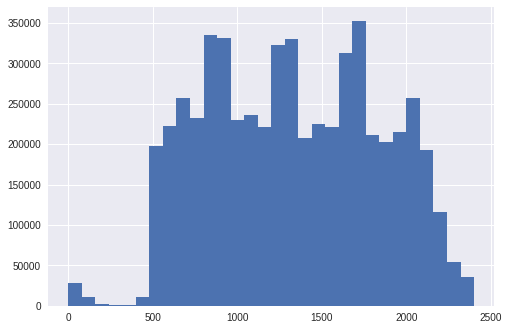

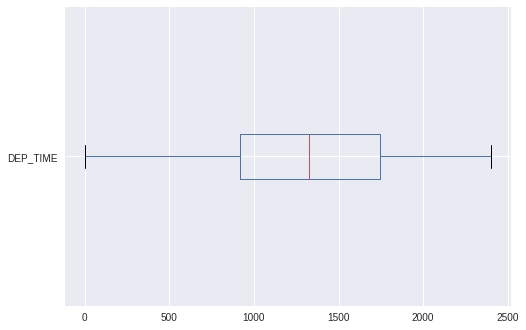

--------------------
DEP_DELAY :
minimum =  -204.0
maximum =  2149.0
moyenne =  8.98136525137377
médiane =  -2.0
mode =  0   -3.0
dtype: float64
variance =  1585.0425851191942
ecart-type =  39.812593298090924
skewness =  8.893838041227466
kurtosis =  155.1916441242231


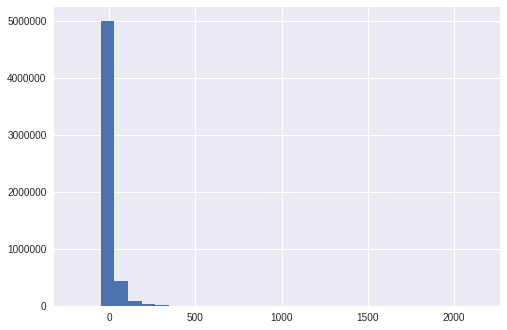

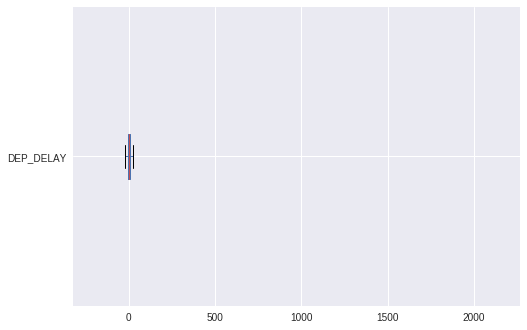

--------------------
DEP_DELAY_NEW :
minimum =  0.0
maximum =  2149.0
moyenne =  11.905880889858103
médiane =  0.0
mode =  0    0.0
dtype: float64
variance =  1503.8470523697627
ecart-type =  38.77946689125268
skewness =  9.421633674853641
kurtosis =  169.84664698850813


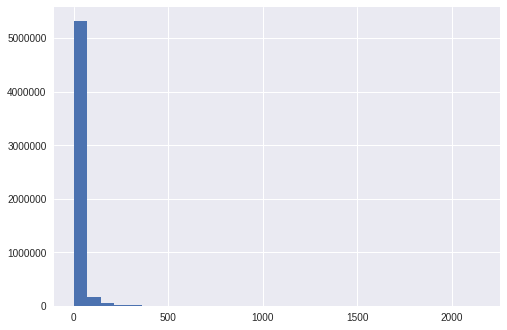

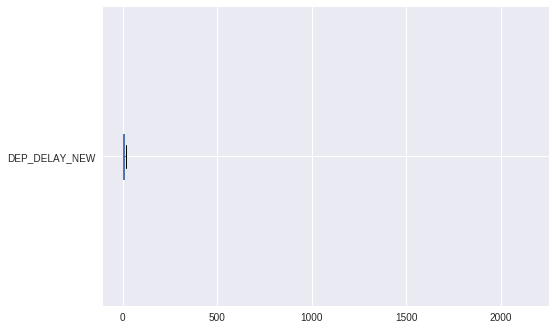

--------------------
DEP_DEL15 :
minimum =  0.0
maximum =  1.0
moyenne =  0.1720926868827097
médiane =  0.0
mode =  0    0.0
dtype: float64
variance =  0.14247679401239205
ecart-type =  0.3774609834305952
skewness =  1.7374373288240605
kurtosis =  1.0186888372080167


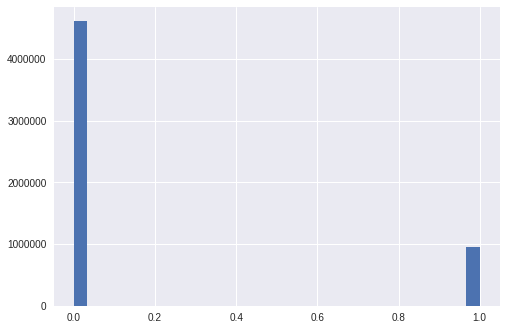

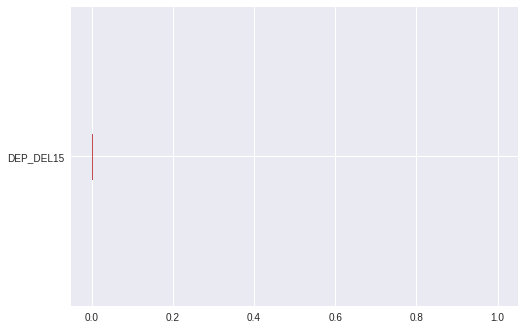

--------------------
DEP_DELAY_GROUP :
minimum =  -2.0
maximum =  12.0
moyenne =  -0.01153929186124783
médiane =  -1.0
mode =  0   -1.0
dtype: float64
variance =  4.321962070720281
ecart-type =  2.078932916358842
skewness =  3.5236129146569106
kurtosis =  14.281503971379898


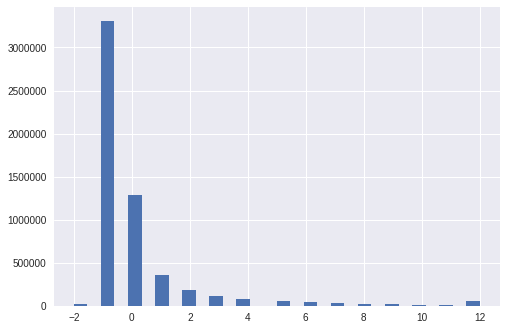

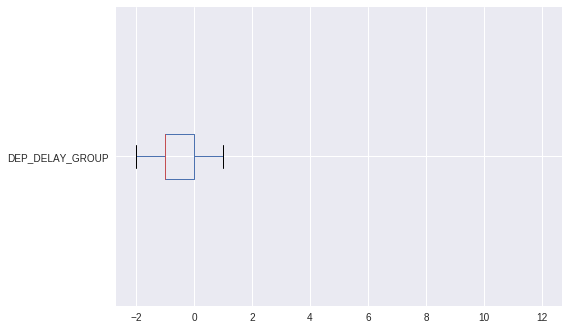

--------------------
ARR_TIME :
minimum =  1.0
maximum =  2400.0
moyenne =  1471.6664506703041
médiane =  1511.0
mode =  0    1643.0
dtype: float64
variance =  285696.04593369074
ecart-type =  534.5054218000887
skewness =  -0.3718963200871397
kurtosis =  -0.38133763891792194


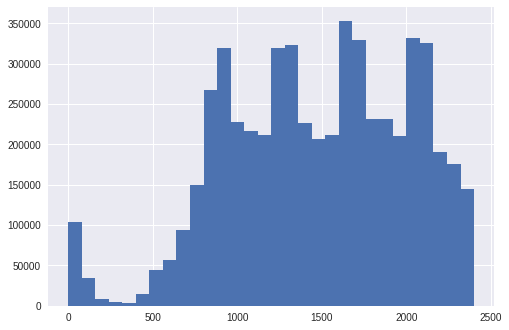

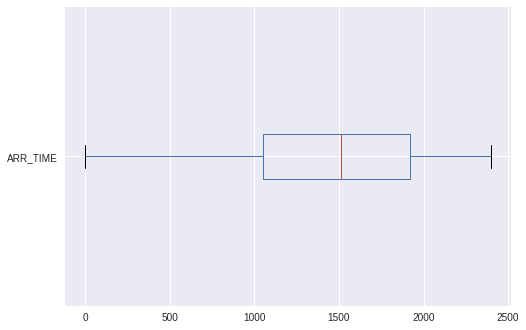

--------------------
ARR_DELAY :
minimum =  -152.0
maximum =  2142.0
moyenne =  3.5364038502587563
médiane =  -6.0
mode =  0   -9.0
dtype: float64
variance =  1757.491440047932
ecart-type =  41.92244553992445
skewness =  7.731418573022935
kurtosis =  127.37780677924029


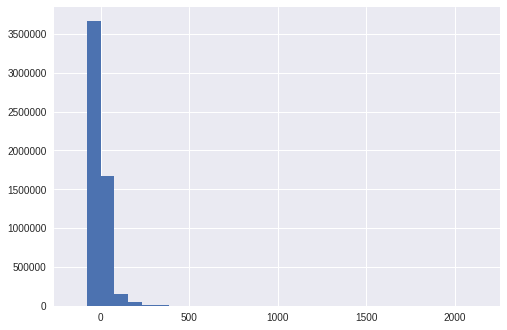

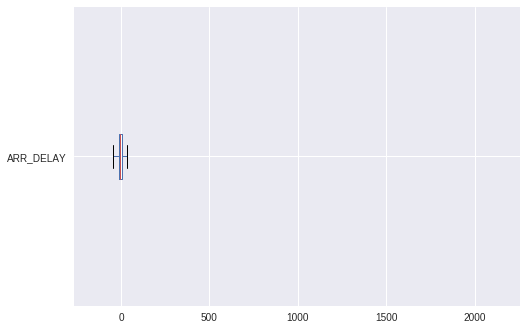

--------------------
ARR_DELAY_NEW :
minimum =  0.0
maximum =  2142.0
moyenne =  11.868486688199377
médiane =  0.0
mode =  0    0.0
dtype: float64
variance =  1475.54702356009
ecart-type =  38.41284971933337
skewness =  9.486103814521845
kurtosis =  173.3730665735622


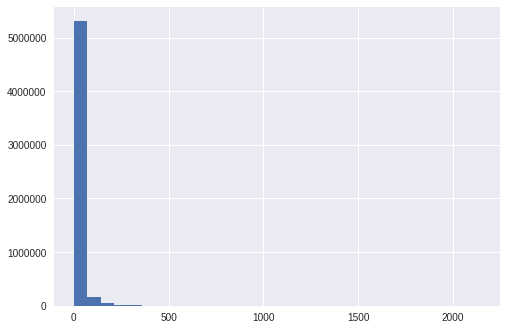

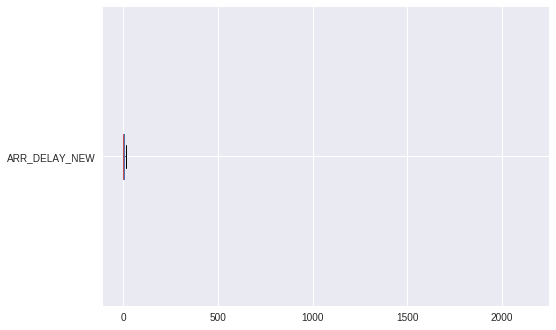

--------------------
ARR_DEL15 :
minimum =  0.0
maximum =  1.0
moyenne =  0.17429904405854507
médiane =  0.0
mode =  0    0.0
dtype: float64
variance =  0.14391888728635646
ecart-type =  0.37936642878140453
skewness =  1.7170788933679846
kurtosis =  0.9483602674199147


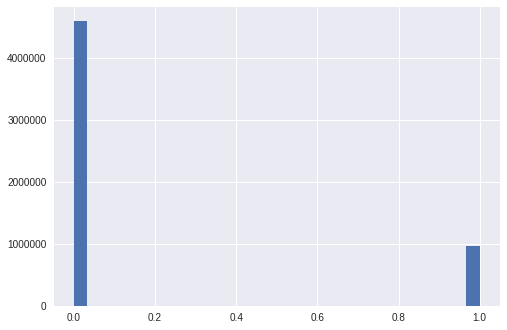

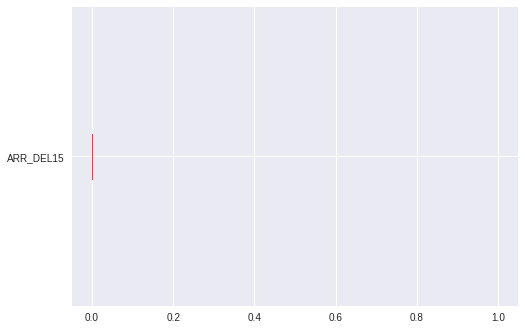

--------------------
ARR_DELAY_GROUP :
minimum =  -2.0
maximum =  12.0
moyenne =  -0.26727899185738163
médiane =  -1.0
mode =  0   -1.0
dtype: float64
variance =  4.87477462052417
ecart-type =  2.20788917759116
skewness =  3.1000029925604418
kurtosis =  11.819735939275425


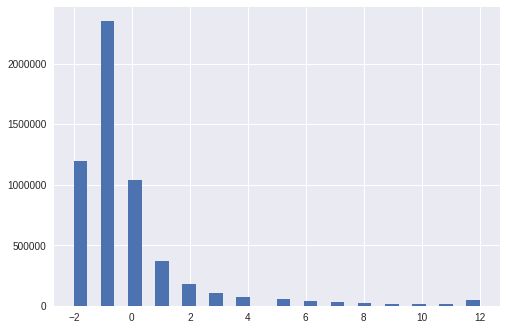

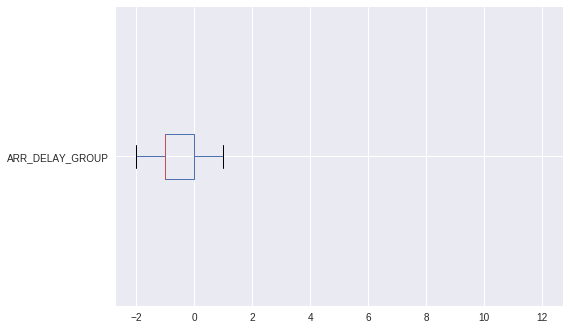

--------------------
CRS_ELAPSED_TIME :
minimum =  5.0
maximum =  705.0
moyenne =  145.2144112219212
médiane =  126.0
mode =  0    80.0
dtype: float64
variance =  5821.8293133007055
ecart-type =  76.30091292573573
skewness =  1.289613116355162
kurtosis =  1.7603675144286925


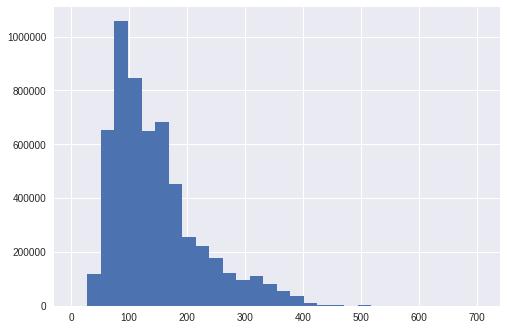

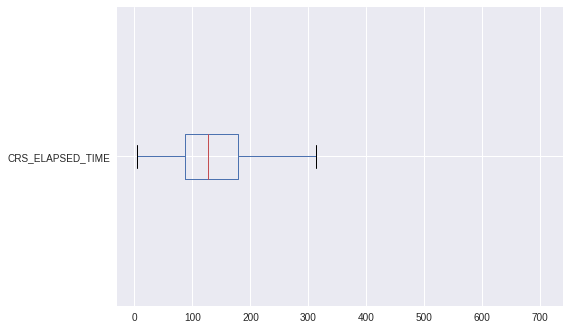

--------------------
ACTUAL_ELAPSED_TIME :
minimum =  14.0
maximum =  778.0
moyenne =  139.95197740468885
médiane =  121.0
mode =  0    80.0
dtype: float64
variance =  5704.79364241119
ecart-type =  75.5300843532641
skewness =  1.2970766252527062
kurtosis =  1.8209315051337902


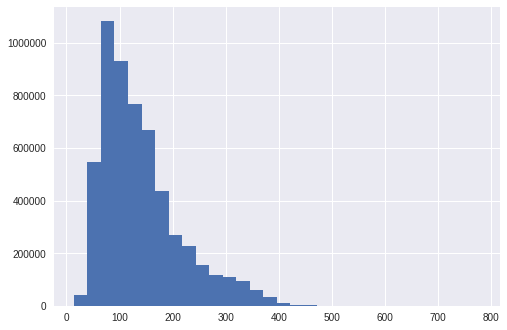

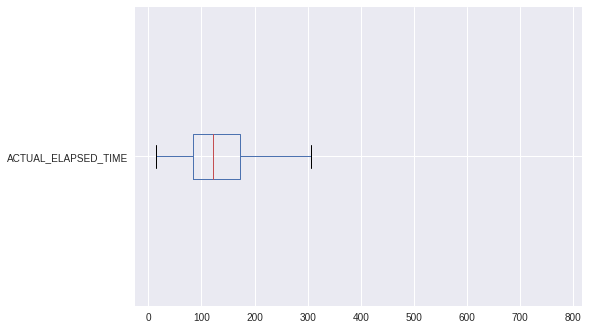

--------------------
AIR_TIME :
minimum =  4.0
maximum =  723.0
moyenne =  116.31896655212189
médiane =  97.0
mode =  0    62.0
dtype: float64
variance =  5386.499174801085
ecart-type =  73.3927733145511
skewness =  1.3174571289986683
kurtosis =  1.861219467867008


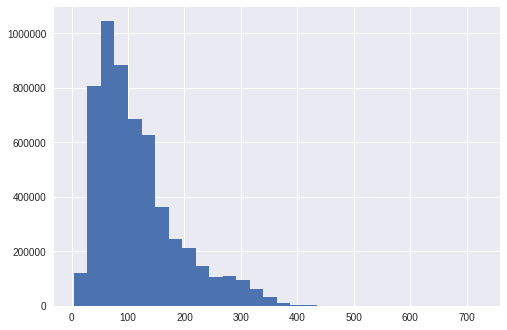

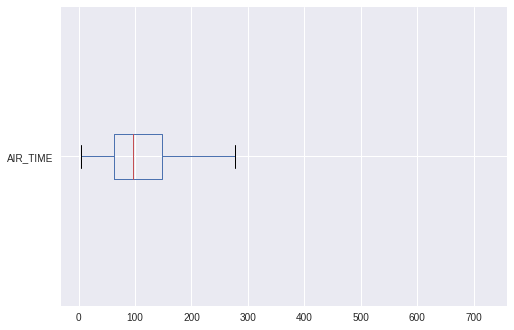

--------------------
DISTANCE :
minimum =  25.0
maximum =  4983.0
moyenne =  848.261456269767
médiane =  678.0
mode =  0    337.0
dtype: float64
variance =  382294.8575498793
ecart-type =  618.299973758595
skewness =  1.3507038683623278
kurtosis =  1.9587252447216197


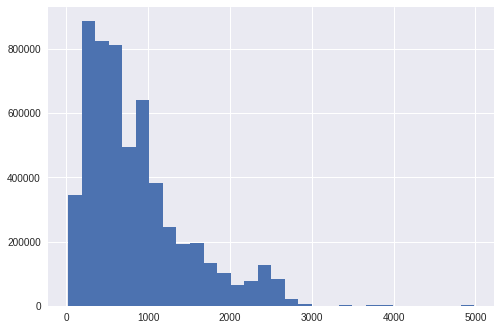

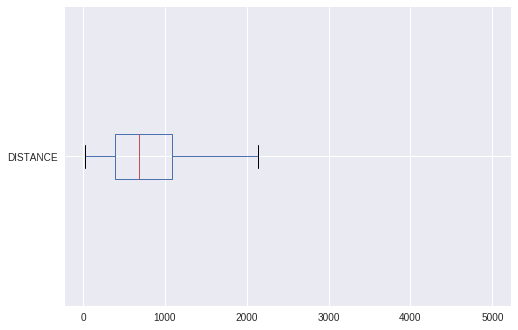

--------------------
DISTANCE_GROUP :
minimum =  1.0
maximum =  11.0
moyenne =  3.864898974888994
médiane =  3.0
mode =  0    2.0
dtype: float64
variance =  5.912119653973504
ecart-type =  2.4314850717151244
skewness =  1.1637917844662793
kurtosis =  0.8606538825722279


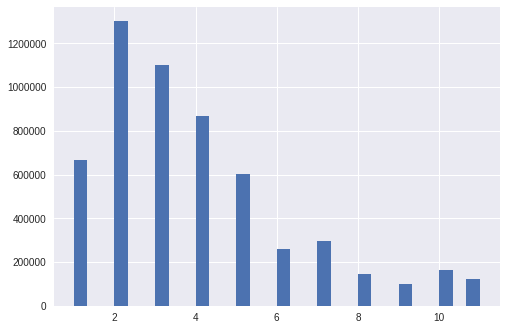

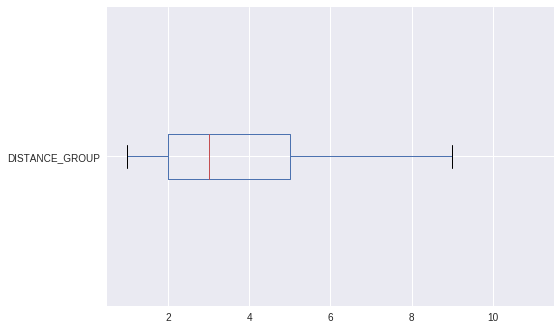

--------------------


In [20]:
#Tableau des indicateurs de tendance centrale
for col in range(len(global_df.columns)):
    if global_df.dtypes[col]== 'float64':
        print(global_df.columns[col], ":")
        print("minimum = ", global_df[global_df.columns[col]].min())
        print("maximum = ", global_df[global_df.columns[col]].max())        
        print("moyenne = ", global_df[global_df.columns[col]].mean())
        print("médiane = ", global_df[global_df.columns[col]].median())
        print("mode = ", global_df[global_df.columns[col]].mode())
        print("variance = ",global_df[global_df.columns[col]].var(ddof=0))
        print("ecart-type = ",global_df[global_df.columns[col]].std(ddof=0))
        print("skewness = ",global_df[global_df.columns[col]].skew())
        print("kurtosis = ",global_df[global_df.columns[col]].kurtosis())
        global_df[global_df.columns[col]].hist(bins = 30)
        plt.show()
        global_df.boxplot(column=global_df.columns[col], vert=False, sym='o')
        plt.show()
        print("-"*20)

In [0]:
### Suppression des valeurs manquantes

In [22]:
global_df.shape

(5635977, 35)

In [23]:
global_df.isna().sum()
#y_train_gb.isna().sum()
#X_feat.isna().sum()

YEAR                         0
QUARTER                      0
MONTH                        0
DAY_OF_MONTH                 0
DAY_OF_WEEK                  0
UNIQUE_CARRIER               0
AIRLINE_ID                   0
CARRIER                      0
ORIGIN_AIRPORT_ID            0
ORIGIN_AIRPORT_SEQ_ID        0
ORIGIN                       0
ORIGIN_CITY_NAME             0
DEST_AIRPORT_ID              0
DEST_AIRPORT_SEQ_ID          0
DEST                         0
DEST_CITY_NAME               0
CRS_DEP_TIME                 0
DEP_TIME                 63538
DEP_DELAY                63538
DEP_DELAY_NEW            63538
DEP_DEL15                63538
DEP_DELAY_GROUP          63538
DEP_TIME_BLK                 0
CRS_ARR_TIME                 0
ARR_TIME                 67982
ARR_DELAY                79779
ARR_DELAY_NEW            79779
ARR_DEL15                79779
ARR_DELAY_GROUP          79779
ARR_TIME_BLK                 1
CRS_ELAPSED_TIME             8
ACTUAL_ELAPSED_TIME      79780
AIR_TIME

In [0]:
# Listes des colonnes "mandatory"
col_mandat = ['ARR_DELAY_NEW',
              'DAY_OF_WEEK',
              'MONTH',
              'CRS_DEP_TIME',
              'AIRLINE_ID',
              'ORIGIN_AIRPORT_ID',
              'DEST_AIRPORT_ID',
              'ARR_DELAY_NEW'
             ]

global_df.dropna(axis='index', subset=col_mandat, inplace=True)

In [25]:
global_df.shape

(5556198, 35)

In [26]:
global_df.isna().sum()

YEAR                     0
QUARTER                  0
MONTH                    0
DAY_OF_MONTH             0
DAY_OF_WEEK              0
UNIQUE_CARRIER           0
AIRLINE_ID               0
CARRIER                  0
ORIGIN_AIRPORT_ID        0
ORIGIN_AIRPORT_SEQ_ID    0
ORIGIN                   0
ORIGIN_CITY_NAME         0
DEST_AIRPORT_ID          0
DEST_AIRPORT_SEQ_ID      0
DEST                     0
DEST_CITY_NAME           0
CRS_DEP_TIME             0
DEP_TIME                 0
DEP_DELAY                0
DEP_DELAY_NEW            0
DEP_DEL15                0
DEP_DELAY_GROUP          0
DEP_TIME_BLK             0
CRS_ARR_TIME             0
ARR_TIME                 0
ARR_DELAY                0
ARR_DELAY_NEW            0
ARR_DEL15                0
ARR_DELAY_GROUP          0
ARR_TIME_BLK             0
CRS_ELAPSED_TIME         1
ACTUAL_ELAPSED_TIME      1
AIR_TIME                 1
DISTANCE                 1
DISTANCE_GROUP           1
dtype: int64

In [27]:
index1 = global_df.loc[global_df.isna().ORIGIN_AIRPORT_ID == True].index
index2 = global_df.loc[global_df.isna().DEST_AIRPORT_ID == True].index
print(index1)
print(index2)

Int64Index([], dtype='int64')
Int64Index([], dtype='int64')


In [0]:
# X_feat.drop(index1, inplace  = True)
# y_train_gb.drop(index1, inplace  = True)

# X_feat.drop(index2, inplace  = True)
# y_train_gb.drop(index2, inplace  = True)

## 5.Jeux de test et d'entrainement

### 5.1.Séparation jeux de test et entrainement

In [29]:
#Sauvegarde de global_df
data_filename_memmap = os.path.join(folder, 'global_df_memmap')
dump(global_df, data_filename_memmap)

['/content/gdrive/My Drive/Colab Notebooks/joblib_memmap/global_df_memmap']

In [0]:
# Récupération de global_df
data_filename_memmap = os.path.join(folder, 'global_df_memmap')
global_df = load(data_filename_memmap, mmap_mode='r')

In [0]:
X = global_df.drop("ARR_DELAY_NEW", axis=1)
y = global_df["ARR_DELAY_NEW"]

# X_train_gb, X_test_gb, y_train_gb, y_test_gb = train_test_split(X, y, test_size=0.2)
X_train_gb, X_test_gb, y_train_gb, y_test_gb = train_test_split(X, y, train_size = 0.8, test_size=0.2, stratify= X['MONTH'])
# On génère le dataset d'entrainement, et celui de test

In [32]:
X_train_gb.shape, y_train_gb.shape

((4444958, 34), (4444958,))

In [33]:
X_test_gb.shape, y_test_gb.shape

((1111240, 34), (1111240,))

### 5.2.Suppression des outliers sur X_train

In [34]:
# On calcule le quantile du délai sur les vols ayant du retard
# q = y_train_gb.quantile(0.99)
q = y_train_gb[y_train_gb > 0].quantile(0.99)
print("quantile: {}".format(q))

quantile: 264.0


In [35]:
# y_train_gb[y_train_gb < q]

index1 = y_train_gb.loc[y_train_gb >= q].index
# print(index1)

X_train_gb.drop(index1, inplace  = True)
y_train_gb.drop(index1, inplace  = True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


##6.Définition des features

### 6.1.Recherche de corrélation

In [36]:
# pairwise correlation
global_df.corr(method='pearson').style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

/usr/local/lib/python3.6/dist-packages/matplotlib/colors.py:512: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,AIRLINE_ID,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,DEP_DELAY_NEW,DEP_DEL15,DEP_DELAY_GROUP,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,ARR_DELAY_NEW,ARR_DEL15,ARR_DELAY_GROUP,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,DISTANCE_GROUP
YEAR,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
QUARTER,nan,1.0,0.97,0.003,0.0062,-0.012,0.0042,0.0042,0.004,0.004,-0.0034,-0.003,0.0087,0.0081,0.0088,0.0095,-0.00092,-0.00089,0.011,0.0082,0.0097,0.011,-0.00099,0.00066,-0.0011,0.0043,0.004
MONTH,nan,0.97,1.0,0.0041,-0.0005,-0.0058,0.0028,0.0028,0.0027,0.0027,-0.0029,-0.0025,0.01,0.0096,0.012,0.011,-0.0011,-0.0012,0.014,0.01,0.014,0.015,-0.0002,0.0023,0.00027,0.0048,0.0046
DAY_OF_MONTH,nan,0.003,0.0041,1.0,0.00076,-0.00072,-0.00047,-0.00047,-6.7e-05,-6.7e-05,-0.0001,-8.9e-05,0.0099,0.009,0.012,0.012,-0.002,-0.0041,0.011,0.0097,0.012,0.013,0.0029,0.004,0.0037,0.0029,0.0029
DAY_OF_WEEK,nan,0.0062,-0.0005,0.00076,1.0,0.0032,0.0057,0.0057,0.0055,0.0055,0.0068,0.0061,0.005,0.0044,0.0058,0.006,0.0061,0.0045,0.00037,0.0028,0.0016,0.00027,0.016,0.014,0.016,0.018,0.018
AIRLINE_ID,nan,-0.012,-0.0058,-0.00072,0.0032,1.0,-0.0025,-0.0025,-0.0023,-0.0023,0.0055,-0.00017,0.015,0.034,0.0076,0.014,-0.0051,-0.0067,0.026,0.042,0.026,0.025,0.024,0.031,0.0043,-0.0052,-0.0049
ORIGIN_AIRPORT_ID,nan,0.0042,0.0028,-0.00047,0.0057,-0.0025,1.0,1.0,0.02,0.02,-0.037,-0.035,-0.0038,-3e-05,0.0017,-0.00098,-0.0046,-0.0027,0.0046,0.0015,0.007,0.006,0.056,0.061,0.063,0.084,0.089
ORIGIN_AIRPORT_SEQ_ID,nan,0.0042,0.0028,-0.00047,0.0057,-0.0025,1.0,1.0,0.02,0.02,-0.037,-0.035,-0.0038,-3e-05,0.0017,-0.00098,-0.0046,-0.0027,0.0046,0.0015,0.007,0.006,0.056,0.061,0.063,0.084,0.089
DEST_AIRPORT_ID,nan,0.004,0.0027,-6.7e-05,0.0055,-0.0023,0.02,0.02,1.0,1.0,0.037,0.037,0.0037,0.003,0.016,0.01,0.025,0.024,0.013,0.005,0.02,0.02,0.091,0.097,0.1,0.084,0.089
DEST_AIRPORT_SEQ_ID,nan,0.004,0.0027,-6.7e-05,0.0055,-0.0023,0.02,0.02,1.0,1.0,0.037,0.037,0.0037,0.003,0.016,0.01,0.025,0.024,0.013,0.005,0.02,0.02,0.091,0.097,0.1,0.084,0.089


### 6.2.Recherche de lien avec le retard - Analyse bivariée Retard  / toutes les autres variables

Visualiation du retard moyen / médian sur une sélection de variables:
* week-end / semaine
* jour de la semaine
* heure de la journée (départ / arrivée)
* mois de l'année
* compagnie aérienne
* distance du vol
* temps prévu en vol

Le but est de chercher une analyse exhaustive sur les influences sur le retard, dans le but de déterminer les features à créer pour la régression.

CRS_DEP_TIME


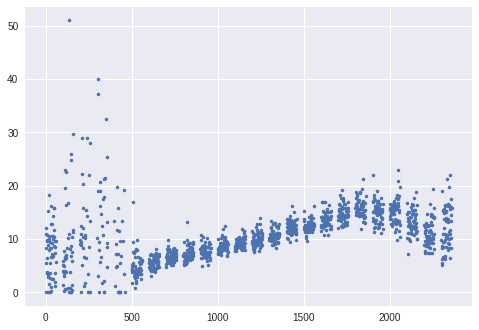

DEP_TIME_BLK


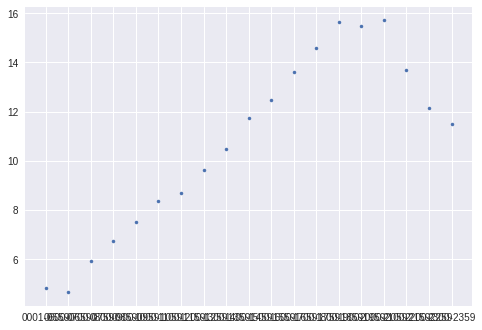

CRS_ELAPSED_TIME


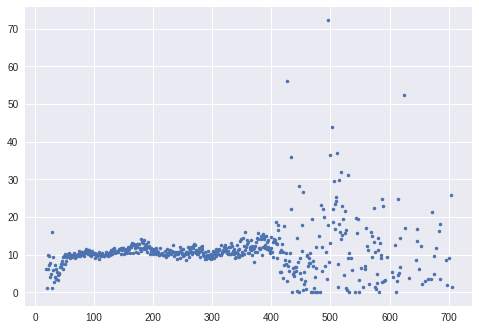

AIR_TIME


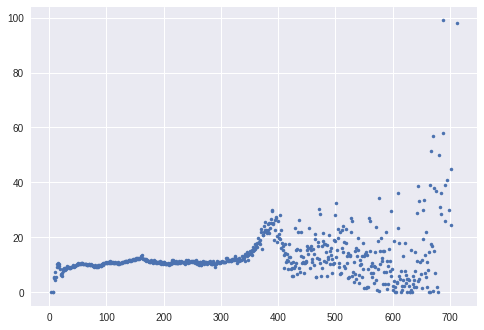

DISTANCE


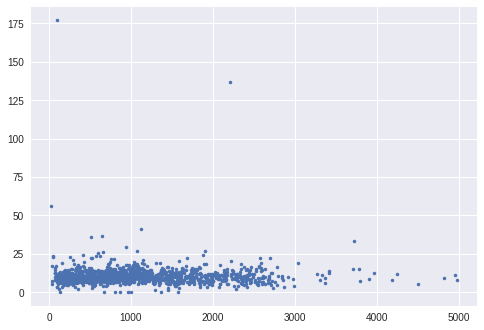

DISTANCE_GROUP


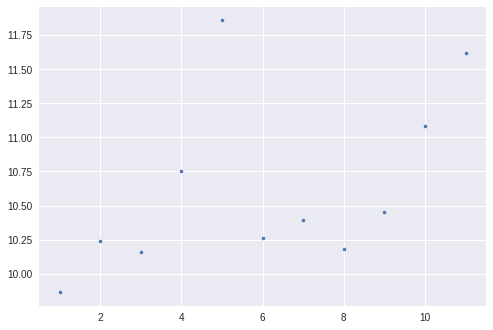

In [37]:
empty_df = pd.DataFrame()

list_col = ['CRS_DEP_TIME', 'DEP_TIME_BLK', 'CRS_ELAPSED_TIME',
            'AIR_TIME', 'DISTANCE','DISTANCE_GROUP'
           ]

for champs in list_col:
  print(champs)
  resultat = empty_df
  
  liste_valeurs = sorted(pd.unique(X_train_gb[champs]))
#   print(liste_valeurs)

  for valeur in liste_valeurs:
#     print(valeur)
    data_val = y_train_gb[X_train_gb[champs]==valeur]
    resultat = resultat.append({champs : valeur,
                               "Moy_n": data_val.mean(),
                               "Med_n": data_val.median()
                              }, ignore_index=True)
#     print(resultat)

  plt.plot(resultat[champs], resultat['Moy_n'], '.')
  plt.show()

#   resultat['Moy_n'].hist(bins = 60)
#   plt.show()

In [38]:
y_train_gb.median()

0.0

In [39]:
y_train_gb.mean()

10.50013059300965

la majorité des vols n'ont pas de retard (0 minute), donc la médiane est 0 et n'est pas utilisable pour la recherche de corrélation avec le retard. On utilisera par conséquent la moyenne des retards observés.

#### a.Jour de la semaine

   Day  Med_n      Moy_n
0  1.0    0.0  10.599539
1  2.0    0.0   9.827360
2  3.0    0.0   9.608322
3  4.0    0.0  11.720350
4  5.0    0.0  11.719280
5  6.0    0.0   9.294109
6  7.0    0.0  10.486566


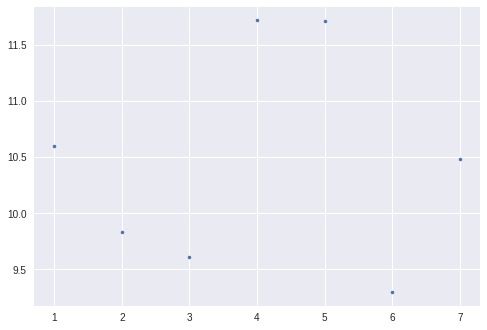

In [40]:
resultat = pd.DataFrame()
for d_nbr in range(1,8):
    data_day = y_train_gb[X_train_gb['DAY_OF_WEEK']==d_nbr]
    resultat = resultat.append({'Day' : d_nbr ,
                             #'Moy' : data_day.loc[:,"ARR_DELAY"].mean(),
                             #'Med': data_day.loc[:,"ARR_DELAY"].median(),
                             "Moy_n" : data_day.mean(),
                             "Med_n": data_day.median()
                            }, ignore_index=True)
print(resultat)
plt.plot(resultat['Day'], resultat['Moy_n'], '.') 
plt.show()

Les valeurs sont plus élevée les jeudi et vendredi. On Pourrait également créer une zone intermédiaire pour Dimanche et Lundi, puis une troisième avec les autres jours.

#### b.Mois de l'année

    Med_n  Month      Moy_n
0     0.0    1.0   9.490366
1     0.0    2.0   9.175357
2     0.0    3.0  10.186817
3     0.0    4.0   8.479625
4     0.0    5.0   9.301675
5     0.0    6.0  12.825208
6     0.0    7.0  15.168439
7     0.0    8.0  13.359716
8     0.0    9.0   8.194585
9     0.0   10.0   7.679517
10    0.0   11.0   7.378419
11    0.0   12.0  13.679710


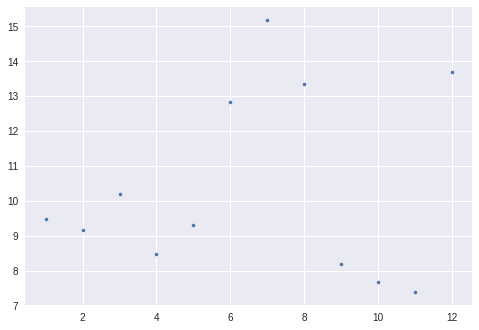

In [41]:
resultat = pd.DataFrame()
for m_nbr in range(1,13):
    data_m = y_train_gb[X_train_gb['MONTH']==m_nbr]
    resultat = resultat.append({'Month' : m_nbr ,
                             "Moy_n" : data_m.mean(),
                             "Med_n": data_m.median()
                            }, ignore_index=True)
print(resultat)
plt.plot(resultat['Month'], resultat['Moy_n'], '.') 
plt.show()

On voit que les valeurs de retard moyen sont supérieures sur les mois de Juin, Juillet, Aout et Décembre. Cela peut correspondre aux périodes de congés d'été et de fêtes de fin d'année.

#### c.Heure de la journée

CRS_DEP_TIME représente l'heure prévue de départ(1100 pour 11:00).

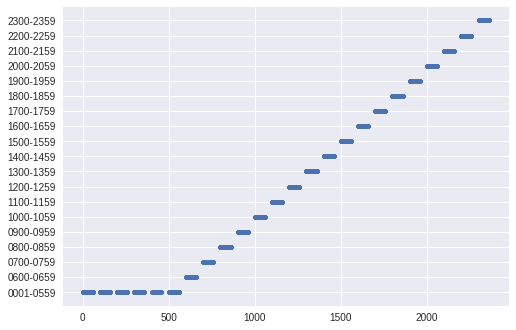

In [42]:
# Observation du lien entre CRS_DEP_TIME et DEP_TIME_BLK
dep_time_sorted = X_train_gb.sort_values(by=['CRS_DEP_TIME'])

plt.plot(dep_time_sorted['CRS_DEP_TIME'], dep_time_sorted['DEP_TIME_BLK'], '.')
plt.show()

Comme on peut s'y attendre, DEP_TIME_BLK correspond bien au créneau horaire de CRS_DEP_TIME. On peut donc utiliser DEP_TIME_BLK directement, si on trouve une corrélation avec le retard.

On va tout de même tracer le retard observé moyen pour chaque heure de départ prévue, ainsi que la moyenne par créneau horaire.

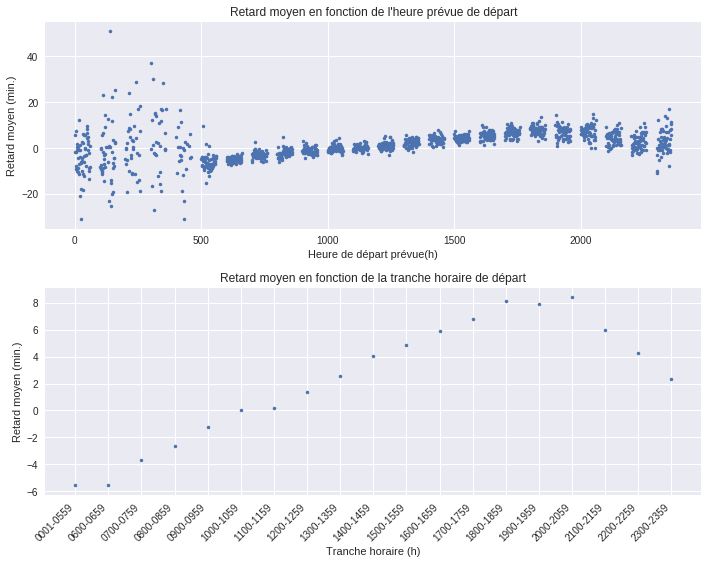

In [43]:
# empty_df = pd.DataFrame()
# resultat = pd.DataFrame()

# list_col = ['CRS_DEP_TIME','DEP_TIME_BLK']

# for champs in list_col:
# #   resultat = empty_df
  
#   liste_valeurs = pd.unique(dep_time_sorted[champs])

#   for valeur in liste_valeurs:
#     data_val = dep_time_sorted[dep_time_sorted[champs]==valeur]
#     resultat = resultat.append({champs : valeur,
#                                "Moy_n": data_val.ARR_DELAY.mean(),
#                                "Med_n": data_val.ARR_DELAY.median()
#                               }, ignore_index=True)
def form_plot(champs):
  resultat = pd.DataFrame()
  liste_valeurs = pd.unique(dep_time_sorted[champs])

  for valeur in liste_valeurs:
    data_val = dep_time_sorted[dep_time_sorted[champs]==valeur]
    resultat = resultat.append({champs : valeur,
                               "Moy_n": data_val.ARR_DELAY.mean(),
                               "Med_n": data_val.ARR_DELAY.median()
                              }, ignore_index=True)  
  return resultat


plt.figure(1, figsize=(10,8))

plt.subplot(211)
res_heure = form_plot('CRS_DEP_TIME')
plt.title("Retard moyen en fonction de l'heure prévue de départ")
plt.xlabel('Heure de départ prévue(h)')
plt.ylabel('Retard moyen (min.)')
plt.grid(True)
plt.plot(res_heure['CRS_DEP_TIME'], res_heure['Moy_n'], '.')


plt.subplot(212)
res_tranche = form_plot('DEP_TIME_BLK')
plt.title("Retard moyen en fonction de la tranche horaire de départ")
plt.xlabel('Tranche horaire (h)')
plt.ylabel('Retard moyen (min.)')
plt.grid(True)

plt.xticks(rotation = 45, horizontalalignment='right')

plt.plot(res_tranche['DEP_TIME_BLK'], res_tranche['Moy_n'], '.')


plt.tight_layout()
plt.show()

On observe de grandes variations sur la moyenne par horaire précis avant 5h et après 20h. On pourrait vérifier si cela est dû à un nombre de vols plus faible, et donc un poids plus important si un ou plusieurs ont connu des retards exceptionnellement grands.

Sur l'observation par tranche horaire, on observe une croissance quasi rectiligne  jusqu'à 20h, puis une diminution. On va donc utiliser ce critère dans notre régression.

Création du dictionnaire qui permettra de créer une feature correspondant au retard moyen de la tranche horaire d'un vol:

In [0]:
my_dict = {'DEP_TIME_BLK': res_tranche['DEP_TIME_BLK'],
         'Moy_n': res_tranche['Moy_n']}

Feat_TIME = pd.DataFrame.from_dict(my_dict)

In [45]:
Feat_TIME

,DEP_TIME_BLK,Moy_n
0,0001-0559,-5.546772
1,0600-0659,-5.508442
2,0700-0759,-3.708017
3,0800-0859,-2.676494
4,0900-0959,-1.198567
5,1000-1059,0.071952
6,1100-1159,0.204912
7,1200-1259,1.378088
8,1300-1359,2.593569
9,1400-1459,4.076637


In [0]:
time_cat = {res_tranche['DEP_TIME_BLK'][i]: res_tranche['Moy_n'][i] for i in range(0,len(res_tranche))}

In [47]:
time_cat

{'0001-0559': -5.546771574871987,
 '0600-0659': -5.5084417436109225,
 '0700-0759': -3.7080170203733736,
 '0800-0859': -2.6764935820828697,
 '0900-0959': -1.1985666227877725,
 '1000-1059': 0.07195191778174087,
 '1100-1159': 0.204911747659144,
 '1200-1259': 1.378087842023358,
 '1300-1359': 2.5935685968483475,
 '1400-1459': 4.07663717740669,
 '1500-1559': 4.884479432080946,
 '1600-1659': 5.9108171335605455,
 '1700-1759': 6.7897233470582234,
 '1800-1859': 8.15956033817693,
 '1900-1959': 7.8763347223126505,
 '2000-2059': 8.432131802783262,
 '2100-2159': 5.9624297110933995,
 '2200-2259': 4.2784674516732295,
 '2300-2359': 2.3495178089237494}

#### d.Compagnie aérienne

On cherche si il existe des niveaux de performance dans le retard moyen de chaque compagnie aérienne:

     Cie_ID  Med_n      Moy_n
0   19790.0    0.0   7.910808
1   19393.0    0.0   9.836719
2   19805.0    0.0  11.565293
3   19930.0    0.0   6.626392
4   19977.0    0.0  11.178982
5   20436.0    0.0  14.508128
6   20366.0    0.0  11.947533
7   20304.0    0.0  10.465711
8   20409.0    0.0  15.049025
9   19690.0    0.0   4.238340
10  20416.0    0.0  14.992880
11  21171.0    0.0  13.947866


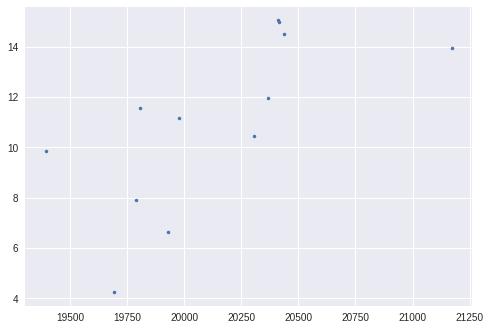

In [48]:
resultat = pd.DataFrame()
liste_cies = X_train_gb.AIRLINE_ID.unique()

for cie in liste_cies:
    data_cie = y_train_gb[X_train_gb['AIRLINE_ID']==cie]
    resultat = resultat.append({'Cie_ID' : int(cie) ,
                             "Moy_n" : data_cie.mean(),
                             "Med_n": data_cie.median()
                            }, ignore_index=True)
print(resultat)
plt.plot(resultat['Cie_ID'], resultat['Moy_n'], '.')
plt.show()

Le retard moyen varie de 4 à 15 minutes en fonction de la compagnie aérienne.On va donc utiliser ce critère. Il n'y a que 12 compagnies, on va donc utiliser du one hot encoding pour créer cette feature.

#### e.Aéroport de départ

On cherche si il existe des niveaux de performance dans le retard moyen de chaque aéroport de départ:

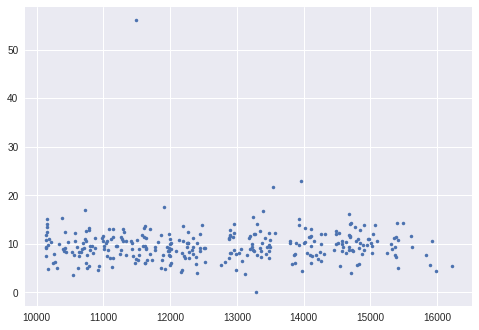

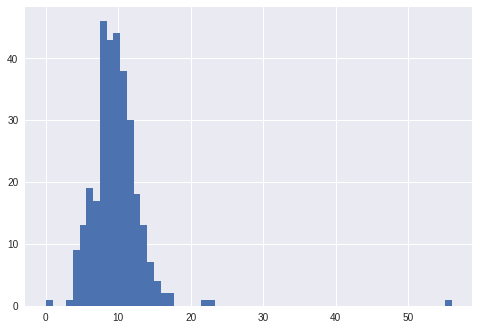

In [49]:
resultat = pd.DataFrame()
liste_depart = X_train_gb.ORIGIN_AIRPORT_ID.unique()

for aprt in liste_depart:
    data_dep = y_train_gb[X_train_gb['ORIGIN_AIRPORT_ID']==aprt]
    resultat = resultat.append({'Départ_ID' : aprt ,
                             #'Moy' : data_dep.loc[:,"ARR_DELAY"].mean(),
                             #'Med': data_dep.loc[:,"ARR_DELAY"].median(),
                             #"Moy_n" : data_dep.loc[:,"ARR_DELAY_NEW"].mean(),
                             #"Med_n": data_dep.loc[:,"ARR_DELAY_NEW"].median()
                                "Moy_n" : data_dep.mean(),
                                "Med_n": data_dep.median()
                            }, ignore_index=True)
# print(resultat)
plt.plot(resultat['Départ_ID'], resultat['Moy_n'], '.')
#plt.plot(resultat['Départ_ID'], resultat['Moy'], 'r.') 
plt.show()

resultat['Moy_n'].hist(bins = 60)
plt.show()

Le retard moyen varie de 0 à une vingtaine de minutes. On va donc créer une feature qui correpond à une note de performance, fonction du retard moyen de chaque aéroport.

In [0]:
# Regrouper les aéroports en catégories
bins = [-1, 5, 10, 20, 30, 100]
categ = pd.cut(resultat['Moy_n'], bins, labels = ["1","2","3","4","5"])


In [51]:
categ.isna().sum()

0

In [52]:
categ.unique()

[2, 3, 1, 4, 5]
Categories (5, object): [1 < 2 < 3 < 4 < 5]

In [0]:
resultat2 = np.append(resultat, pd.DataFrame(categ),axis=1)
df_result = pd.DataFrame(data=resultat2, columns = ['Départ_ID', 'Med_n', 'Moy_n', 'dep_cat'])

In [0]:
dep_categ = [df_result["Départ_ID"], df_result["dep_cat"]]

dep_categ est donc la correspondance entre chaque ID d'aéroport et sa catégorie de performance (entre 1 et 5).

#### f.Aéroport d'arrivée

On effectue le même travail sur l'aéroport d'arrivée.

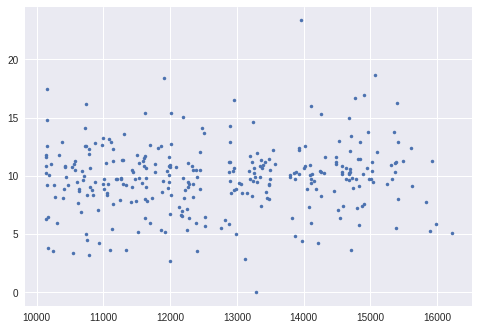

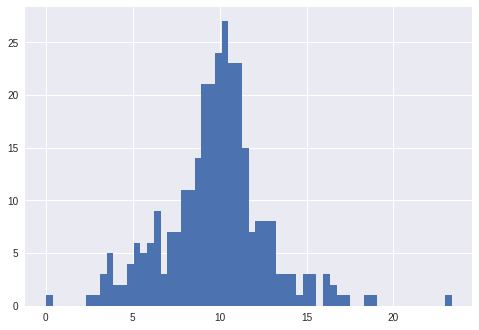

In [55]:
resultat = pd.DataFrame()
liste_arrivee = X_train_gb.DEST_AIRPORT_ID.unique()

for aprt in liste_arrivee:
    data_arr = y_train_gb[X_train_gb['DEST_AIRPORT_ID']==aprt]
    resultat = resultat.append({'Arrivée_ID' : int(aprt) ,
                             #'Moy' : data_arr.loc[:,"ARR_DELAY"].mean(),
                             #'Med': data_arr.loc[:,"ARR_DELAY"].median(),
                             #"Moy_n" : data_arr.loc[:,"ARR_DELAY_NEW"].mean(),
                             #"Med_n": data_arr.loc[:,"ARR_DELAY_NEW"].median()
                             "Moy_n": data_arr.mean(),
                             "Med_n": data_arr.median()
                            }, ignore_index=True)
    
plt.plot(resultat['Arrivée_ID'], resultat['Moy_n'], '.')
plt.show()

resultat['Moy_n'].hist(bins = 60)
plt.show()

In [0]:
# Regrouper les aéroports en catégories
bins = [-1, 5, 10, 15, 20, 60]
arr_categ = pd.cut(resultat['Moy_n'], bins, labels = ["1","2","3","4","5"])

In [57]:
arr_categ.unique()

[2, 3, 4, 1, 5]
Categories (5, object): [1 < 2 < 3 < 4 < 5]

In [0]:
resultat3 = np.append(resultat, pd.DataFrame(arr_categ),axis=1)
df_result2 = pd.DataFrame(data=resultat3, columns = ['Arrivée_ID', 'Med_n', 'Moy_n', 'arr_cat'])

In [59]:
df_result2.head()

,Arrivée_ID,Med_n,Moy_n,arr_cat
0,11433,0,9.0459,2
1,12191,0,9.81947,2
2,13796,0,10.092,3
3,12892,0,12.8962,3
4,14747,0,8.95266,2


In [0]:
arr_categ = [df_result2["Arrivée_ID"], df_result2["arr_cat"]]

arr_categ est donc la correspondance entre chaque ID d'aéroport et sa catégorie de performance (entre 1 et 5) à l'arrivée.

#### g.Jours fériés

On cherche à déterminer si le retard est corrélé à la proximité d'un jour férié. On peut en effet imaginer un afflux de voyageur à ces moments de l'année.
Liste déterminée depuis https://www.timeanddate.com/holidays/us/2016 (Federal holidays uniquement)

In [0]:
holidays= ['2016-01-01', '2016-01-18', '2016-02-15', '2016-05-30', 
           '2016-07-04', '2016-09-05', '2016-10-10', '2016-11-11',
           '2016-11-24', '2016-12-25', '2016-12-26', '2017-01-01']
holidayDates = [datetime.datetime.strptime(x, '%Y-%m-%d') for x in holidays]

In [0]:
def DaysToHoliday(year, month, day):
  """calculate number of days from input date to next holiday
  """

  # Create a DATE object we can use to calculate the time difference
 
  currDate = datetime.datetime(year,month,day) 

  numDays = min([abs(currDate - x) for x in holidayDates]) # Now find the minimum difference between the date and our holidays
  return(numDays.days)                                          # We can vectorize this to automatically find the minimum closest
                                                           # holiday by subtracting all holidays at once

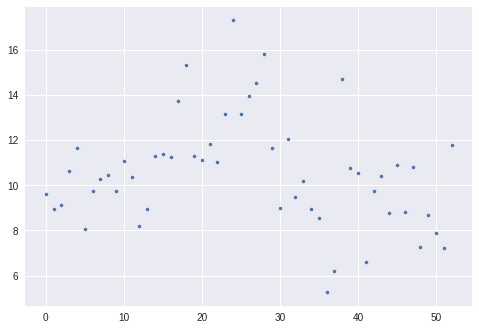

In [63]:
resultat = pd.DataFrame()

# Nombre de jours séparant le vol d'un jour férié
hdays_gb = pd.DataFrame(X_train_gb.apply(lambda row: DaysToHoliday(row['YEAR'],\
           row['MONTH'], row['DAY_OF_MONTH']), axis=1), columns = ['HDAYS'])

liste_hdays = hdays_gb.HDAYS.unique()

for hday in liste_hdays:
    data_hdays = y_train_gb[hdays_gb['HDAYS']==hday]
    resultat = resultat.append({'HDAYS' : int(hday),
                                "Moy_n": data_hdays.mean(),
                                "Med_n": data_hdays.median()
                                }, ignore_index=True)

plt.plot(resultat['HDAYS'], resultat['Moy_n'], '.')
plt.show()


#### h.Taille aéroport

In [0]:
apt_size = X_train_gb.groupby('ORIGIN_AIRPORT_ID')['DEP_TIME'].nunique()

In [65]:
apt_size

ORIGIN_AIRPORT_ID
10135     448
10136      59
10140    1116
10141     138
10146     252
10154     237
10155     346
10157     453
10158     579
10165      51
10170      95
10185     533
10208     574
10245      34
10257     917
10279     611
10299    1282
10333     154
10372     760
10397    1297
10408     563
10423    1155
10431     638
10434     309
10469     435
10529    1103
10551     137
10561     428
10577     228
10581     225
         ... 
14905     138
14908     940
14952     312
14960     190
14986     628
15016    1182
15024     540
15027     248
15041     298
15070     228
15096     828
15249     500
15304    1198
15323     542
15356     451
15370    1017
15376     999
15380     541
15389     232
15401     200
15411     164
15412     834
15497     107
15607     229
15624     673
15841     161
15897      85
15919     749
15991     137
16218     402
Name: DEP_TIME, Length: 310, dtype: int64

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


(array([0.00051991, 0.00127614, 0.00155973, 0.00108708, 0.00089803,
        0.00070897, 0.00094529, 0.0008035 , 0.00089803, 0.00037812,
        0.00037812, 0.00051991, 0.00070897, 0.00033085, 0.0008035 ,
        0.00051991, 0.00075623, 0.00056717, 0.0006617 , 0.00033085]),
 array([1.00000e+00, 6.92500e+01, 1.37500e+02, 2.05750e+02, 2.74000e+02,
        3.42250e+02, 4.10500e+02, 4.78750e+02, 5.47000e+02, 6.15250e+02,
        6.83500e+02, 7.51750e+02, 8.20000e+02, 8.88250e+02, 9.56500e+02,
        1.02475e+03, 1.09300e+03, 1.16125e+03, 1.22950e+03, 1.29775e+03,
        1.36600e+03]),
 <a list of 20 Patch objects>)

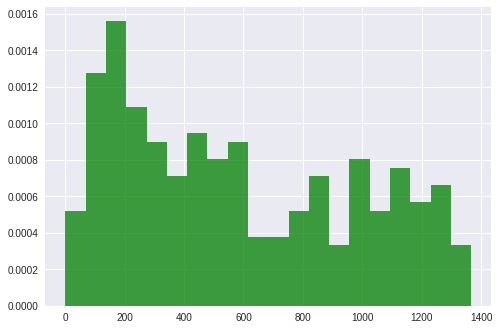

In [66]:
plt.hist(apt_size, 20, normed=1, facecolor='g', alpha=0.75)

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


(array([0.00051991, 0.00127614, 0.00155973, 0.00108708, 0.00089803,
        0.00070897, 0.00094529, 0.0008035 , 0.00089803, 0.00037812,
        0.00037812, 0.00051991, 0.00070897, 0.00033085, 0.0008035 ,
        0.00051991, 0.00075623, 0.00056717, 0.0006617 , 0.00033085]),
 array([1.00000e+00, 6.92500e+01, 1.37500e+02, 2.05750e+02, 2.74000e+02,
        3.42250e+02, 4.10500e+02, 4.78750e+02, 5.47000e+02, 6.15250e+02,
        6.83500e+02, 7.51750e+02, 8.20000e+02, 8.88250e+02, 9.56500e+02,
        1.02475e+03, 1.09300e+03, 1.16125e+03, 1.22950e+03, 1.29775e+03,
        1.36600e+03]),
 <a list of 20 Patch objects>)

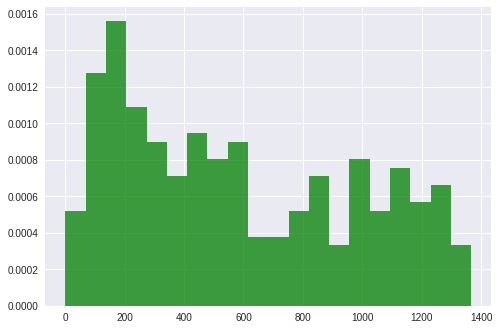

In [67]:
plt.hist(apt_size, 20, normed=1, facecolor='g', alpha=0.75)

### 6.3.Application des features au jeu d'entrainement

#### a.Features

In [0]:
# Jour de la semaine
days_cat = {1:'2', 2:'1',3:'1',4:'3',5:'3',6:'1',7:'2'}
X_feat_1 = X_train_gb['DAY_OF_WEEK'].map(days_cat)

In [0]:
# Mois de l'année
month_cat = {1:'1',2:'1',3:'1',4:'1',5:'1',6:'2',7:'2',8:'2',9:'1',10:'1',11:'1',12:'2'}
X_feat_2 = X_train_gb['MONTH'].map(month_cat)

In [0]:
# Compagnie aérienne
X_feat_3 = pd.get_dummies(X_train_gb['AIRLINE_ID']) #, prefix='cie')

In [71]:
X_feat_3.columns

Int64Index([19393, 19690, 19790, 19805, 19930, 19977, 20304, 20366, 20409,
            20416, 20436, 21171],
           dtype='int64')

In [0]:
# Aéroport de départ
dep_cat = {int(dep_categ[0][i]): dep_categ[1][i] for i in range(0, len(dep_categ[0]))}
X_feat_4 = X_train_gb['ORIGIN_AIRPORT_ID'].map(dep_cat)

In [0]:
# Aéroport d'arrivée'
arr_cat = {arr_categ[0][i]: arr_categ[1][i] for i in range(0, len(arr_categ[0]))}
X_feat_5 = X_train_gb['DEST_AIRPORT_ID'].map(arr_cat)

In [0]:
# Heure de départ
X_feat_6 = X_train_gb['DEP_TIME_BLK'].map(time_cat)

# X_feat_6 = pd.get_dummies(X_train_gb['DEP_TIME_BLK'])

In [0]:
# Nombre de jours séparant le vol d'un jour férié
X_feat_7 = pd.DataFrame(X_train_gb.apply(lambda row: DaysToHoliday(row['YEAR'],\
           row['MONTH'], row['DAY_OF_MONTH']), axis=1), columns = ['HDAYS'])

In [76]:
# Sauvegarde
data_filename_memmap = os.path.join(folder, 'feat1_memmap')
dump(days_cat, data_filename_memmap)

data_filename_memmap = os.path.join(folder, 'feat2_memmap')
dump(month_cat, data_filename_memmap)

data_filename_memmap = os.path.join(folder, 'feat3_memmap')
dump(X_feat_3.columns, data_filename_memmap)

data_filename_memmap = os.path.join(folder, 'feat4_memmap')
dump(dep_cat, data_filename_memmap)

data_filename_memmap = os.path.join(folder, 'feat5_memmap')
dump(arr_cat, data_filename_memmap)

data_filename_memmap = os.path.join(folder, 'feat6_memmap')
dump(time_cat, data_filename_memmap)

['/content/gdrive/My Drive/Colab Notebooks/joblib_memmap/feat6_memmap']

#### b.Concaténation

In [0]:
X_feat = pd.concat([X_feat_1, X_feat_2, X_feat_3, X_feat_4, X_feat_5, X_feat_6, X_feat_7], axis = 1, join = 'inner')

In [78]:
X_feat.shape

(4429793, 18)

In [79]:
X_feat.head()

,DAY_OF_WEEK,MONTH,19393,19690,19790,19805,19930,19977,20304,20366,20409,20416,20436,21171,ORIGIN_AIRPORT_ID,DEST_AIRPORT_ID,DEP_TIME_BLK,HDAYS
1595750,3,1,0,0,1,0,0,0,0,0,0,0,0,0,2,2,8.432132,32
793893,2,1,1,0,0,0,0,0,0,0,0,0,0,0,2,2,-3.708017,7
2486071,1,2,1,0,0,0,0,0,0,0,0,0,0,0,3,3,-3.708017,16
2715949,1,2,0,0,0,1,0,0,0,0,0,0,0,0,3,3,-3.708017,16
2270372,3,1,0,0,0,0,1,0,0,0,0,0,0,0,3,2,-5.508442,18


In [80]:
X_feat.isna().sum()

DAY_OF_WEEK          0
MONTH                0
19393                0
19690                0
19790                0
19805                0
19930                0
19977                0
20304                0
20366                0
20409                0
20416                0
20436                0
21171                0
ORIGIN_AIRPORT_ID    0
DEST_AIRPORT_ID      0
DEP_TIME_BLK         0
HDAYS                0
dtype: int64

In [81]:
index1 = X_feat.loc[X_feat.isna().ORIGIN_AIRPORT_ID == True].index
index2 = X_feat.loc[X_feat.isna().DEST_AIRPORT_ID == True].index
print(index1)
print(index2)

Int64Index([], dtype='int64')
Int64Index([], dtype='int64')


In [0]:
X_feat.drop(index1, inplace  = True)
y_train_gb.drop(index1, inplace  = True)

# X_feat.drop(index2, inplace  = True)
# y_train_gb.drop(index2, inplace  = True)

## 7.Application des règles de création des features au jeu de test

In [0]:
X_test_1 = X_test_gb['DAY_OF_WEEK'].map(days_cat)
X_test_2 = X_test_gb['MONTH'].map(month_cat)
X_test_3 = pd.get_dummies(X_test_gb['AIRLINE_ID']) #, prefix='cie')
X_test_4 = X_test_gb['ORIGIN_AIRPORT_ID'].map(dep_cat)
X_test_5 = X_test_gb['DEST_AIRPORT_ID'].map(arr_cat)
X_test_6 = X_test_gb['DEP_TIME_BLK'].map(time_cat)
X_test_7 = pd.DataFrame(X_test_gb.apply(lambda row: DaysToHoliday(row['YEAR'],\
           row['MONTH'], row['DAY_OF_MONTH']), axis=1), columns = ['HDAYS'])

X_test = pd.concat([X_test_1, X_test_2, X_test_3, X_test_4, X_test_5, X_test_6,
                    X_test_7], axis = 1, join = 'inner')
X_test.fillna(0, inplace=True)

In [84]:
X_test.isna().sum()

DAY_OF_WEEK          0
MONTH                0
19393                0
19690                0
19790                0
19805                0
19930                0
19977                0
20304                0
20366                0
20409                0
20416                0
20436                0
21171                0
ORIGIN_AIRPORT_ID    0
DEST_AIRPORT_ID      0
DEP_TIME_BLK         0
HDAYS                0
dtype: int64

## 8.Objets nécessaires à l'API

### 8.1.Définition de la table IATA / Nom  de compagnie

In [0]:
# On récupère les champs ID, code IATA de la compagnie aérienne dans un seul df
sub_df1 = global_df['AIRLINE_ID']
sub_df2 = global_df['CARRIER']
sub_df = pd.concat([sub_df1, sub_df2], axis=1)

# On supprime les lignes multiples
sub_df.drop_duplicates(inplace=True)

# On définit l'Id en index
sub_df.set_index('AIRLINE_ID', inplace=True)

# On trie par ordre alphabétique sur nom de compagnie
sub_df.sort_values('CARRIER', axis=0, inplace=True)

In [0]:
# On fait un mapping entre code IATA et Nom de compagnie (récupéré sur Wiki)
iata_list = {'AA': 'American Airlines',
             'AS': 'Alaska Airlines',
             'B6': 'JetBlue Airways',
             'DL': 'Delta Air Lines',
             'F9': 'Frontier Airlines',
             'G4': 'Allegiant Air',
             'HA': 'Hawaiian Airlines',
             'NK': 'Spirit Airlines',
             'SY': 'Sun Country Airlines',
             'UA': 'United Airlines',
             'WN': 'Southwest Airlines',
             'EV': 'ExpressJet',
             'OO': 'SkyWest Airlines',
             'VX': 'Virgin America'
            }
airline_sel = sub_df['CARRIER'].map(iata_list)

# On génère la liste de tuples (ID, Nom de compagnie)
tmp_tuples = [x for x in airline_sel.iteritems()]

# conversion de l'index en str pour l'API
iata_tuples = []
for i,(int_index, str_desc) in enumerate(tmp_tuples):
  iata_tuples.append((str(int_index), str_desc))

In [87]:
# Sauvegarde
data_filename_memmap = os.path.join(folder, 'iata_memmap')
dump(iata_tuples, data_filename_memmap)

['/content/gdrive/My Drive/Colab Notebooks/joblib_memmap/iata_memmap']

### 8.2.Définition de la table ID / Nom  d'aéroport pour l'API

In [0]:
# On récupère les champs ID, ville et code aéroport dans un seul df
sub_df1 = global_df['ORIGIN_AIRPORT_ID']
sub_df2 = global_df['ORIGIN_CITY_NAME']
sub_df3 = global_df['ORIGIN']
sub_df = pd.concat([sub_df1, sub_df2, sub_df3], axis=1)

# On supprime les lignes multiples
sub_df.drop_duplicates(inplace=True)
# On définit l'Id en index
sub_df.set_index('ORIGIN_AIRPORT_ID', inplace=True)
# On trie par ordre alphabétique sur nom de ville puis code aéroport
sub_df.sort_values(['ORIGIN_CITY_NAME','ORIGIN'], axis=0, inplace=True)

In [0]:
# On génère la liste de tuples (ID, ville - code)
airport_tuples = [(str(x.Index), x.ORIGIN_CITY_NAME + " - " + x.ORIGIN) for x in sub_df.itertuples()]

In [90]:
# Sauvegarde
data_filename_memmap = os.path.join(folder, 'apt_memmap')
dump(airport_tuples, data_filename_memmap)

['/content/gdrive/My Drive/Colab Notebooks/joblib_memmap/apt_memmap']

## 9.Sauvegardes

### 9.1.Jeu d'entrainement

In [91]:
# Sauvegarde
data_filename_memmap = os.path.join(folder, 'X_feat_memmap')
dump(X_feat, data_filename_memmap)

data_filename_memmap = os.path.join(folder, 'y_train_memmap')
dump(y_train_gb, data_filename_memmap)


['/content/gdrive/My Drive/Colab Notebooks/joblib_memmap/y_train_memmap']

### 9.2.Jeu de test

In [92]:
# Sauvegarde
data_filename_memmap = os.path.join(folder, 'X_test_memmap')
dump(X_test, data_filename_memmap)

data_filename_memmap = os.path.join(folder, 'y_test_memmap')
dump(y_test_gb, data_filename_memmap)

['/content/gdrive/My Drive/Colab Notebooks/joblib_memmap/y_test_memmap']